In [1]:
# %matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
# set data distribution
mean1 = [2, 5]
cov1 = [[0.1, 0], [0, 0.4]]
x1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2 = [6, 2]
cov2 = [[0.3, 0], [0, 0.1]]
x2 = np.random.multivariate_normal(mean2, cov2, 50)

data = np.concatenate((x1, x2), axis=0)
color = np.zeros(100)
color[50:100] = 1

carray = ['skyblue', 'lightsalmon']
cmap = ListedColormap(carray)

In [3]:
# setup basic constants and functions

zx = 5
zy = 5

def proj(x, y, bx, by):
    w = (x -zx) * bx + (y - zy) * by
    return [w * bx + zx , w * by + zy]

def center(po):
    cx = np.average(po[:,0])
    cy = np.average(po[:,1])    
    return np.array([cx, cy])

def var(v1, v2):
    dif = v1 - v2
    return dif.dot(dif)

cdata1 = center(data[0:50])
cdata2 = center(data[50:100])

def within(po):
    cen = center(po)
    dis = [var(x, cen) for x in po]
    return np.average(dis)

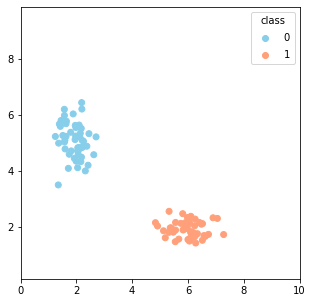

In [4]:
# Set up the figure, axis, and the static plot element
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))

scat = ax.scatter(data[:,0], data[:,1], c=color, cmap=cmap)
ax.legend(*scat.legend_elements(num=1),
                    loc="upper right", title="class")
# ax.add_artist(legend1)
# ax.legend()
line, = ax.plot([], [], lw=2, c='darkgray')
points1, = ax.plot([], [],'o', c=carray[0], alpha=0.35, ms=6)
points2, = ax.plot([], [],'o', c=carray[1], alpha=0.35, ms=6)
dis1, = ax.plot([], [],'x-', c='royalblue', lw=2)
dis2, = ax.plot([], [],'x-', c='orangered', lw=2)
slope_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
vin_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
vbt_text = ax.text(0.02, 0.85, '', transform=ax.transAxes)

self, xdata, ydata, linewidth, linestyle, color, marker, markersize, markeredgewidth, markeredgecolor, markerfacecolor, markerfacecoloralt, fillstyle, antialiased, dash_capstyle, solid_capstyle, dash_joinstyle, solid_joinstyle, pickradius, drawstyle, markevery, **kwargs

In [5]:
frame = 180

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    points1.set_data([], [])
    points2.set_data([], [])
    dis1.set_data([], [])
    dis2.set_data([], [])
    slope_text.set_text('')
    vin_text.set_text('')
    vbt_text.set_text('')
    return line, points1, points2

# animation function, which is called sequentially and generate frames
def animate(i):
    a = i/frame * np.pi
    x = np.linspace(0, 10, 1000)
    y = np.tan(a) * (x - zx) + zy
    projX = np.array([proj(x1, x2, np.cos(a), np.sin(a)) for x1, x2 in data])
    line.set_data(x, y)
    cp1 = center(projX[0:50])
    cp2 = center(projX[50:100])
    points1.set_data(projX[0:50, 0], projX[0:50, 1])
    points2.set_data(projX[50:100, 0], projX[50:100, 1])
    dis1.set_data([cdata1[0], cp1[0]], [cdata1[1], cp1[1]])
    dis2.set_data([cdata2[0], cp2[0]], [cdata2[1], cp2[1]])
    slope_text.set_text('slope angle = %.1f$^o$' % (i*1.8))
    vin = within(projX[0:50] + projX[50:100])
    vin_text.set_text('$Var_{within}$ = %.2f' % vin)
    vbt_text.set_text('$Var_{between}$ = %.2f' % var(cp1, cp2))
    return line, points1, points2


In [6]:
# set the animation embed_limit parameter
# import matplotlib
# matplotlib.rcParams['animation.embed_limit'] = 2**128

# create an animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame, interval=200, blit=True)
html = anim.to_jshtml()

with open('slope.html','w') as f:
    f.write(html)
    
HTML(html)